In [3]:
library(ggplot2)


## Matern covariance


$$
C(t,s) = \frac{\sigma^2}{\Gamma(\nu) 2^{\nu-1}} \left(\frac{\sqrt{s\nu}|t-s|}{\rho} \right)^\nu K_\nu \left(\frac{\sqrt{s\nu}|t-s|}{\rho} \right),    \nu>0. 
$$

In [14]:
matern_cov = function(s, t, nu, rho=1, sigma=1){
    d = abs(t-s)
    
    # to avoid Infinity or Missing Values in Covariance Matrix
    if(d==0){
        return(sigma**2)
    }
    
    a = sqrt(2*nu) * d / rho
    cov = (sigma**2) / (gamma(nu) * (2**(nu-1))) * (a**nu) * besselK(a, nu)
    
    return(cov)
}

In [15]:
n_sim = 100
t_grid = seq(0, 10, length.out=50)
dist = as.matrix(dist(t_grid))
params = list(c(0.5, 1, 1), c(2, 1, 1), c(4, 1, 1))

In [26]:
n_sim = 100
n_grid = 50
x = seq(0, 10, length.out=50)

# initiate covariance matrix 
C1 = matrix(nrow=n_grid, ncol=n_grid)
C2 = matrix(nrow=n_grid, ncol=n_grid)
C3 = matrix(nrow=n_grid, ncol=n_grid)

for(i in 1:n_grid){
  for(j in 1:n_grid){
    C1[i, j] <- matern_cov(x[i], x[j], nu=0.5)
  }
}

for(i in 1:n){
  for(j in 1:n){
    C2[i, j] <- matern_cov(x[i], x[j], nu=2)
  }
}

for(i in 1:n){
  for(j in 1:n){
    C3[i, j] <- matern_cov(x[i], x[j], nu=4)
  }
}

In [51]:
library(MASS)
set.seed(123)
y1 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C1)

set.seed(123)
y2 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C2)

set.seed(123)
y3 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C3)

d1 = data.frame(x,y1)
d2 = data.frame(x,y2)
d3 = data.frame(x,y3)

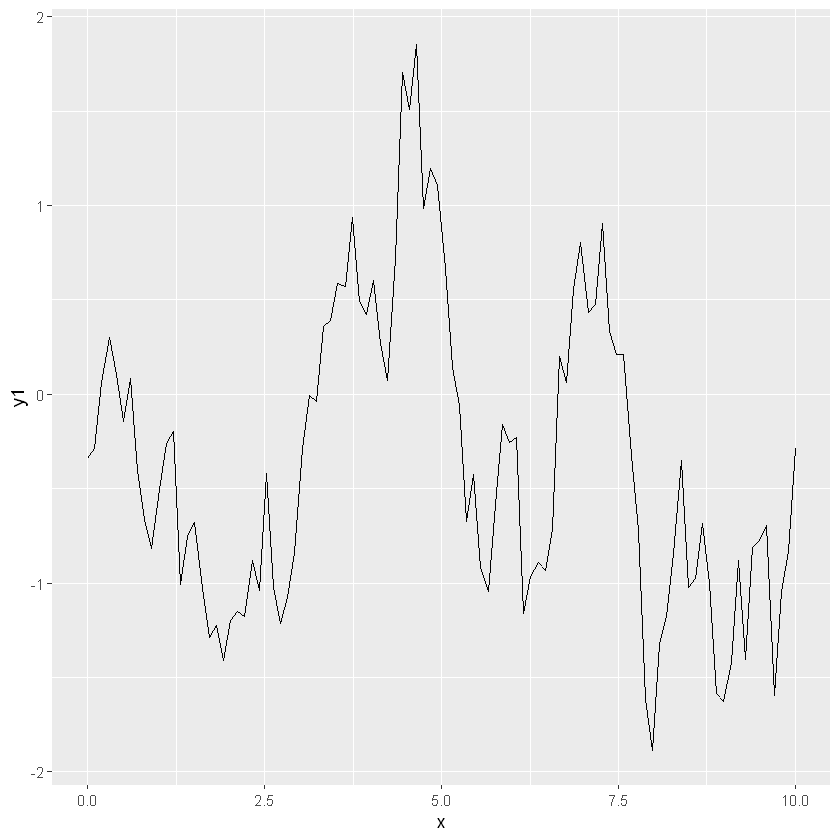

In [52]:
ggplot(d1, aes(x=x, y=y1)) + 
    geom_line()

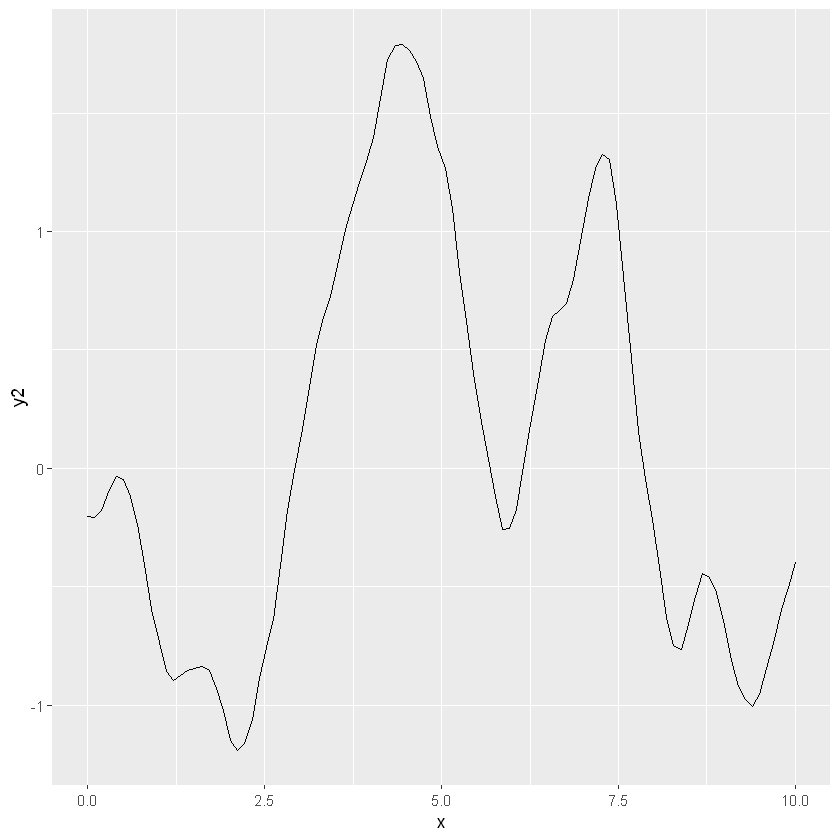

In [53]:
ggplot(d2, aes(x=x, y=y2)) + 
    geom_line()

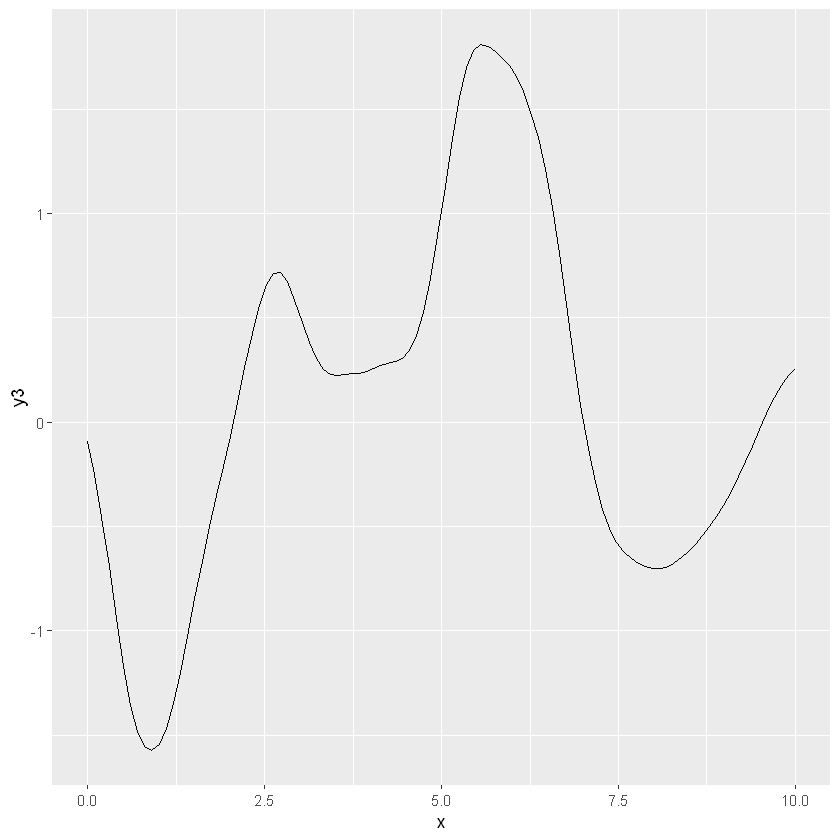

In [54]:
ggplot(d3, aes(x=x, y=y3)) + 
    geom_line()

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

package 'mvtnorm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kenta\AppData\Local\Temp\Rtmp8m13JD\downloaded_packages


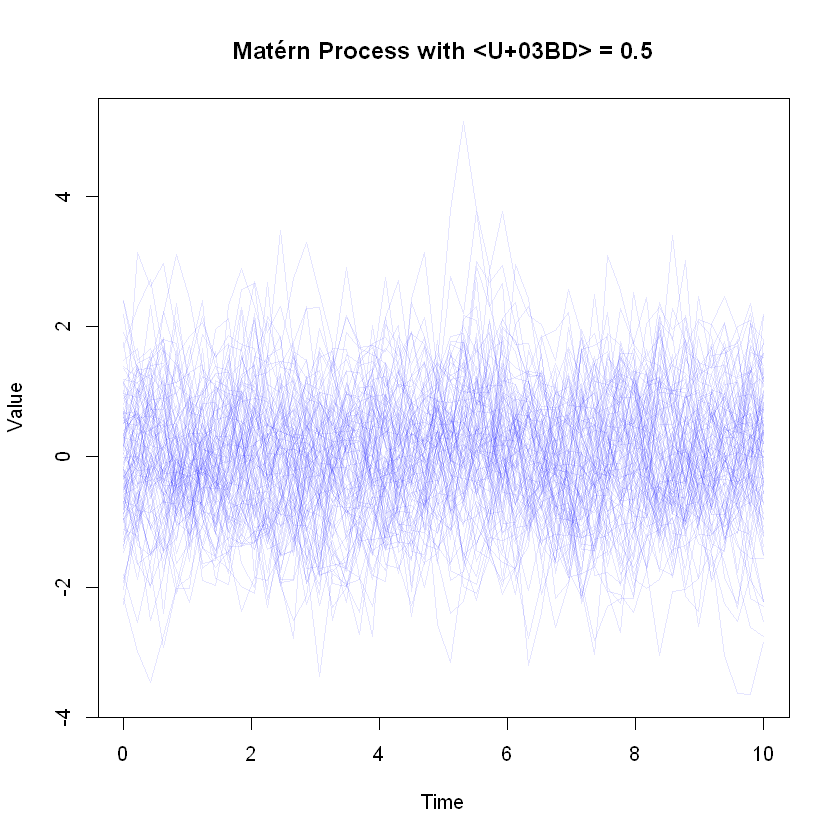

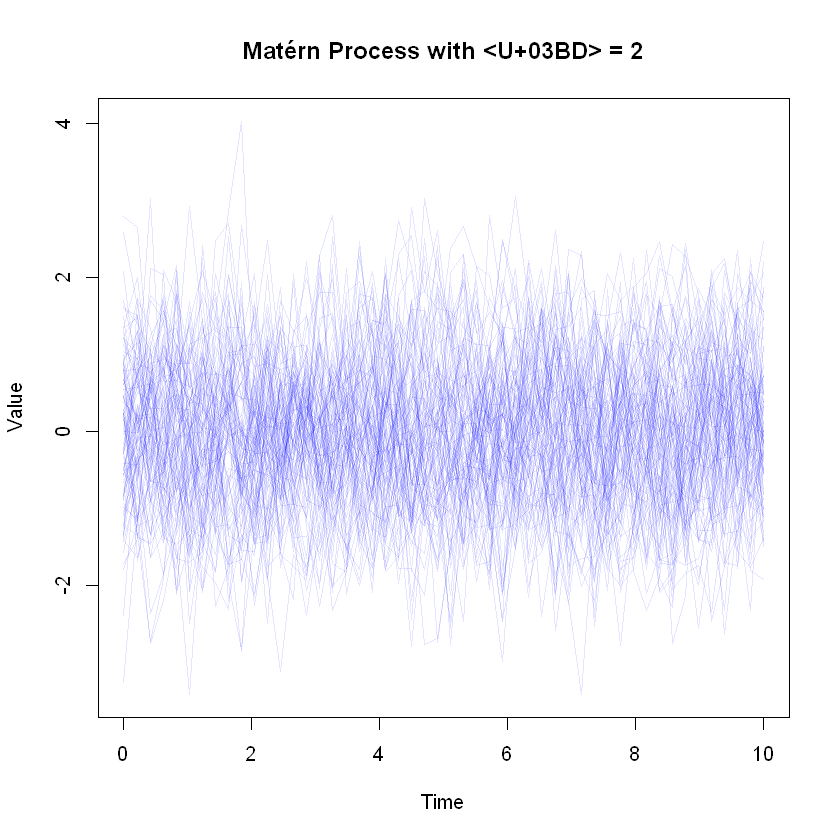

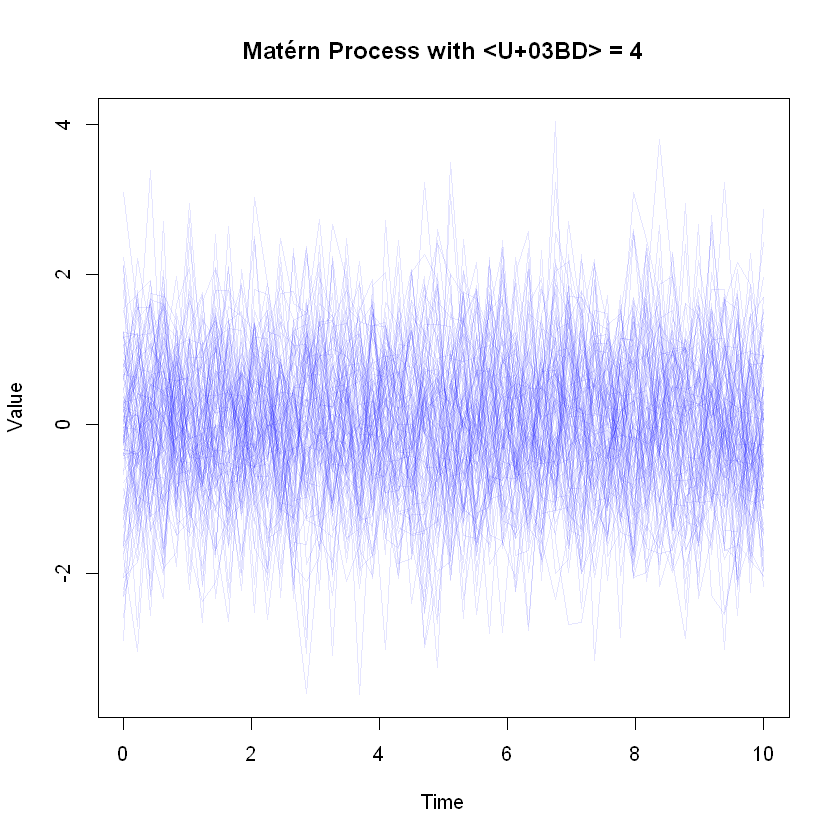

In [16]:
install.packages("mvtnorm")
library(mvtnorm)

matern_cov <- function(d, nu, rho=1, sigma=1) {
  a <- sqrt(2 * nu) * d / rho
  cov <- sigma^2 * (2^(1 - nu) / gamma(nu)) * (a^nu) * besselK(a, nu)
  cov[d == 0] <- sigma^2
  cov[a > 0] <- cov[a > 0] * exp(-sqrt(2 * nu) * a[a > 0] / rho)
  return(cov)
}

n_sims <- 100
t_grid <- seq(0, 10, length.out = 50)
dist <- as.matrix(dist(t_grid))

params <- list(c(0.5, 1, 1), c(2, 1, 1), c(4, 1, 1))

for (param in params) {
  nu <- param[1]
  sigma <- param[2]
  rho <- param[3]

  cov_matrix <- matern_cov(dist, nu, rho, sigma)
  
  matern_iid <- rmvnorm(n_sims, rep(0, length(t_grid)), cov_matrix)
  
  par(mfrow=c(1, 1))
  plot(0, 0, xlim = range(t_grid), ylim = range(matern_iid), type = "n", xlab = "Time", ylab = "Value", main = paste("Matérn Process with ν =", nu))
  for (i in 1:n_sims) {
    lines(t_grid, matern_iid[i, ], col = rgb(0, 0, 1, 0.1))
  }
}
